In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

## part1: Loading and Processing the data

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
Canada= pd.read_excel('Canada.xlsx', 
                       sheet_name='Canada by Citizenship',
                       skiprows=20,
                       skipfooter=2)

In [9]:
Canada.max()

Type                Immigrants
Coverage            Foreigners
OdName                Zimbabwe
AREA                       935
AreaName               Oceania
REG                       5501
RegName         Western Europe
DEV                        902
DevName     Developing regions
1980                     22045
1981                     24796
1982                     20620
1983                     10015
1984                     10170
1985                      9564
1986                      9470
1987                     21337
1988                     27359
1989                     23795
1990                     31668
1991                     23380
1992                     34123
1993                     33720
1994                     39231
1995                     30145
1996                     29322
1997                     22965
1998                     21049
1999                     30069
2000                     35529
2001                     36434
2002                     31961
2003    

In [10]:
Canada.info()
#object is for categorical functions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [11]:
Canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [12]:
Canada.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,114,102,44,32,29,43,68,99,187,129,94,61,72,78,58,39,44,43,49,98,110,191,669,1450,615,454,663,611,508,494,434,437,407


In [13]:
Canada.describe()

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,912.764103,1249.015385,901.753846,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564
std,13.082835,1185.526885,0.431878,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988
min,903.000000,905.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,903.000000,914.000000,902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000
50%,908.000000,922.000000,902.000000,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000
75%,922.000000,925.500000,902.000000,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000
max,935.000000,5501.000000,902.000000,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000


In [14]:
Canada.describe(include='object')

,Type,Coverage,OdName,AreaName,RegName,DevName
count,195,195,195,195,195,195
unique,1,2,195,6,22,2
top,Immigrants,Foreigners,Afghanistan,Africa,Western Asia,Developing regions
freq,195,194,1,54,18,147


In [15]:
Canada.columns=Canada.columns.astype(str)
## to conert every column data type as string

In [16]:
print(Canada.columns.tolist())

['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


## REMOVE COLUMNS

In [17]:
cols_to_drop= ['Type','Coverage','AREA','REG','DEV']
Canada.drop(columns= cols_to_drop, inplace=True)

In [18]:
Canada.head(2)
#to see the first two entries only

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


## ADD COLUMNS

In [19]:
Canada.shape

(195, 38)

In [20]:
years= ['1980', '1981', '1982', '1983', '1984', '1985',
        '1986', '1987', '1988', '1989', '1990', '1991', 
        '1992', '1993', '1994', '1995', '1996', '1997',
        '1998', '1999', '2000', '2001', '2002', '2003',
        '2004', '2005', '2006', '2007', '2008', '2009', 
        '2010', '2011', '2012', '2013']

In [21]:
Canada['total']= Canada.loc[:, years].sum(axis=1)
Canada.head(3)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [22]:
Canada['mean']= Canada.loc[:,years].mean(axis=1)
Canada.head(3)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total,mean
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639,1724.676471
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699,461.735294
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439,2042.323529


## Rename Columns

In [23]:
Canada.rename(
    columns={
        'OdName': 'Country',
        'AreaName': 'Continent',
        'RegName': 'Region',
        'DevName': 'Status',
    },
    inplace= True
)

<AxesSubplot:>

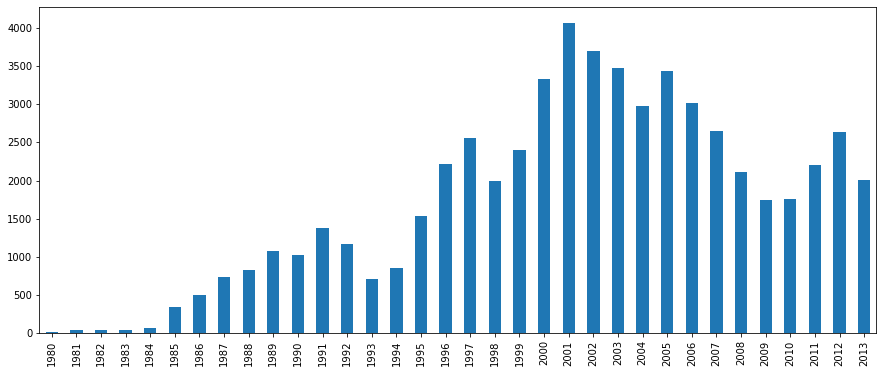

In [24]:
Canada.loc[0,years].plot(kind='bar', figsize=(15,6))

In [25]:
Canada.set_index('Country', inplace=True)

<AxesSubplot:>

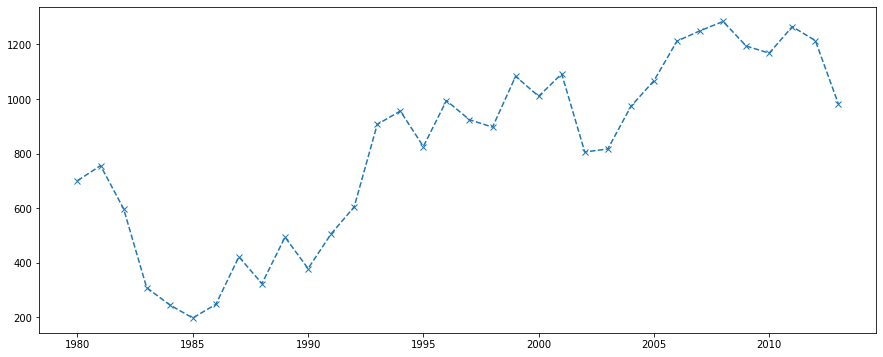

In [26]:
Canada.loc['Japan',years].plot(kind='line', figsize=(15,6), style='x--')

<AxesSubplot:>

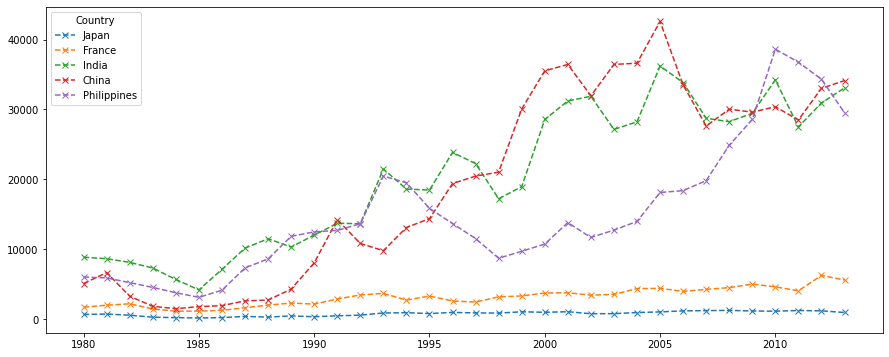

In [27]:
Canada.loc[['Japan','France','India','China', 'Philippines'],years].T.plot(kind='line', figsize=(15,6), style='x--')

df.loc[rowrange, columnrange]
df.loc[:, rangeofyears].sum(axis=1)

In [28]:
Canada['1980-1989']=Canada.loc[:, map(str, range(1980,1990))].sum(axis=1)
Canada['1990-1999']=Canada.loc[:, map(str, range(1990,2000))].sum(axis=1)
Canada['2000-2009']=Canada.loc[:, map(str, range(2000,2010))].sum(axis=1)
Canada.head()

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total,mean,1980-1989,1990-1999,2000-2009
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639,1724.676471,3693,15845,30501
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699,461.735294,9,2568,10799
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439,2042.323529,1271,13153,37833
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6,0.176471,3,2,1
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15,0.441176,2,6,5


In [29]:
# fix the country name
print(Canada.index.tolist())

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong Special Administrative Region', 'China, Macao Special Administrative Region', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Ger

In [31]:
Canada.loc['Algeria'] #series

Continent                Africa
Region          Northern Africa
Status       Developing regions
1980                         80
1981                         67
1982                         71
1983                         69
1984                         63
1985                         44
1986                         69
1987                        132
1988                        242
1989                        434
1990                        491
1991                        872
1992                        795
1993                        717
1994                        595
1995                       1106
1996                       2054
1997                       1842
1998                       2292
1999                       2389
2000                       2867
2001                       3418
2002                       3406
2003                       3072
2004                       3616
2005                       3626
2006                       4807
2007                       3623
2008    

<AxesSubplot:>

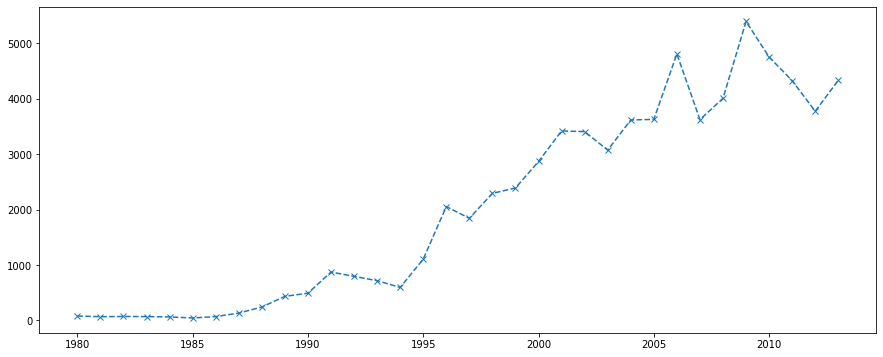

In [33]:
Canada.loc['Algeria', years].plot(kind='line', figsize=(15,6), style='x--') #plot

<AxesSubplot:xlabel='Country'>

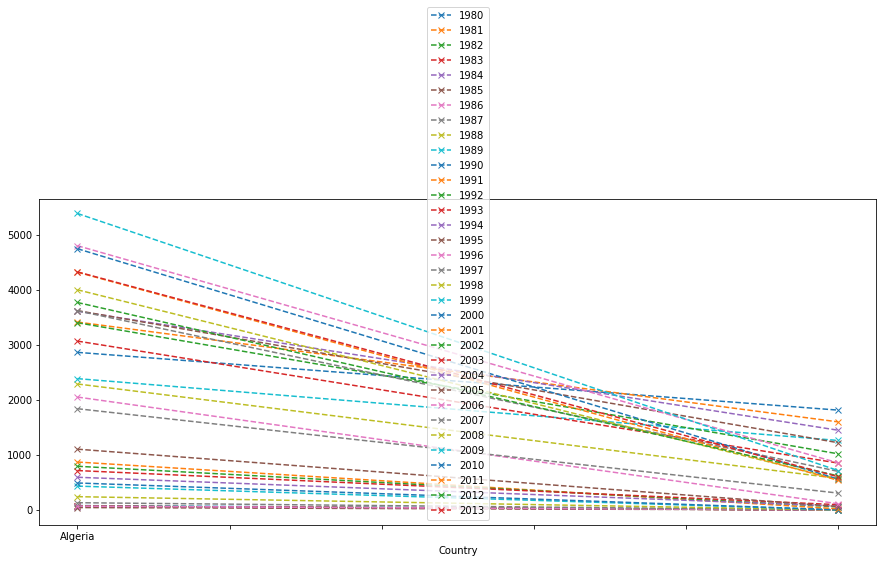

In [39]:
Canada.loc[['Algeria', 'Albania'],years].plot(kind='line', figsize=(15,6), style='x--')

In [40]:
Canada.loc[['Algeria', 'Albania'],years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Algeria,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
Albania,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


<AxesSubplot:>

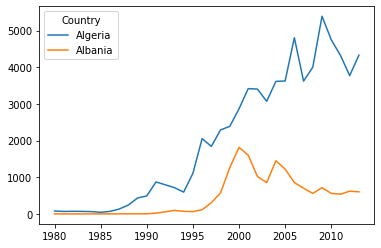

In [41]:
Canada.loc[['Algeria', 'Albania'],years].T.plot()

In [42]:
Canada.loc[['Algeria', 'Albania'],years].T

Country,Algeria,Albania
1980,80,1
1981,67,0
1982,71,0
1983,69,0
1984,63,0
1985,44,0
1986,69,1
1987,132,2
1988,242,2
1989,434,3


<AxesSubplot:ylabel='Japan'>

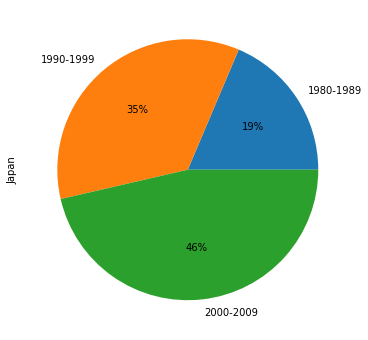

In [49]:
decade_cols = ['1980-1989', '1990-1999', '2000-2009']
plt.figure(facecolor='white')
Canada.loc['Japan', decade_cols].plot(kind='pie', figsize=(10,6), autopct='%1.f%%')

In [50]:
country_list= Canada.index.tolist()

In [51]:
Canada.loc[country_list, decade_cols]

,1980-1989,1990-1999,2000-2009
Country,,,
Afghanistan,3693,15845,30501
Albania,9,2568,10799
Algeria,1271,13153,37833
American Samoa,3,2,1
Andorra,2,6,5
...,...,...,...
Viet Nam,30638,37726,21274
Western Sahara,0,1,1
Yemen,72,756,1395


array([<AxesSubplot:ylabel='Afghanistan'>, <AxesSubplot:ylabel='Albania'>,
       <AxesSubplot:ylabel='Algeria'>,
       <AxesSubplot:ylabel='American Samoa'>,
       <AxesSubplot:ylabel='Andorra'>, <AxesSubplot:ylabel='Angola'>,
       <AxesSubplot:ylabel='Antigua and Barbuda'>,
       <AxesSubplot:ylabel='Argentina'>, <AxesSubplot:ylabel='Armenia'>,
       <AxesSubplot:ylabel='Australia'>, <AxesSubplot:ylabel='Austria'>,
       <AxesSubplot:ylabel='Azerbaijan'>, <AxesSubplot:ylabel='Bahamas'>,
       <AxesSubplot:ylabel='Bahrain'>, <AxesSubplot:ylabel='Bangladesh'>,
       <AxesSubplot:ylabel='Barbados'>, <AxesSubplot:ylabel='Belarus'>,
       <AxesSubplot:ylabel='Belgium'>, <AxesSubplot:ylabel='Belize'>,
       <AxesSubplot:ylabel='Benin'>, <AxesSubplot:ylabel='Bhutan'>,
       <AxesSubplot:ylabel='Bolivia (Plurinational State of)'>,
       <AxesSubplot:ylabel='Bosnia and Herzegovina'>,
       <AxesSubplot:ylabel='Botswana'>, <AxesSubplot:ylabel='Brazil'>,
       <AxesSubplot:ylabel

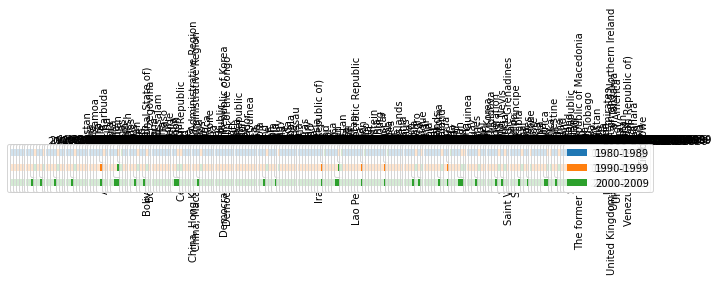

In [56]:
Canada.loc[country_list, decade_cols].T.plot(
    kind='pie',
    figsize=(10,6),
    autopct='%1.f%%',
    subplots='True')

In [53]:
Canada.loc[country_list, decade_cols].T

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,"China, Hong Kong Special Administrative Region","China, Macao Special Administrative Region",Colombia,Comoros,Congo,Costa Rica,Côte d'Ivoire,Croatia,Cuba,Cyprus,Czech Republic,Democratic People's Republic of Korea,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Republic of Moldova,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,State of Palestine,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav Republic of Macedonia,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
1980-1989,3693,9,1271,3,2,50,291,3738,0,4564,1968,0,243,29,2376,2935,0,3351,274,65,2,644,0,49,2530,295,337,48,24,36,171,142,0,17,28,9475,32003,0,0,3069,11,17,735,179,0,1214,686,0,13,302,1596,24,814,1986,2298,7556,21648,1,0,0,3263,5721,1132,17137,22,38,0,18217,2898,7361,1938,6074,67,8,32096,22546,756,5522,120,82154,1824,21477,3985,7647,11975,11487,34328,4296,2733,0,4468,3,67,0,180,1,24918,32,31,310,13,5,49,240,36,9281,1,44,1111,0,27,3292,6131,3,0,0,4792,27,466,26,2,51,10228,0,2719,4132,7,993,720,12,10591,0,244,17,434,6424,60764,57602,40432,2,16259,0,7613,0,62,225,848,1724,23,2,0,90,135,0,117,158,3969,0,0,905,8679,1740,14796,0,357,172,36,2011,5151,5799,0,954,0,82,41,12851,840,4369,0,3,362,0,34,179171,5630,76824,1342,0,0,1816,30638,0,72,221,790
1990-1999,15845,2568,13153,2,6,285,315,5686,602,6574,1546,238,195,145,18532,2388,1755,2430,344,226,18,1062,17789,21,6931,221,7481,154,1085,104,2175,1137,16,69,260,6874,161528,681,0,6252,26,237,1283,738,5260,3969,276,1452,31,5184,1074,266,826,3846,4398,20040,24334,8,427,474,10766,9397,743,30028,90,244,357,14186,13480,3263,3342,9693,493,23,27260,21710,3691,5036,127,180395,2554,54871,18140,3909,20792,5734,40329,8077,10481,2291,4434,5,987,207,368,686,49245,37,384,1051,18,680,53,373,85,8172,7,422,193,0,71,2286,12170,9,15,0,11695,50,1370,26,1,769,6857,0,2344,6581,86,5052,718,50,65302,0,2173,16,488,10206,138482,64864,26904,43,38189,1527,33659,19013,1360,245,994,2487,25,1,2,585,809,0,998,461,4612,1617,237,23103,14019,1100,70421,360,4950,352,32,1652,6198,11340,36,2091,978,416,60,25719,2718,8680,24,1,707,14644,198,261966,3490,56915,1833,459,5,4826,37726,1,756,548,667
2000-2009,30501,10799,37833,1,5,1563,235,8890,1755,8804,1071,1846,190,181,30816,1153,4901,3505,303,1199,951,1043,3518,91,12736,57,13608,920,4704,47,327

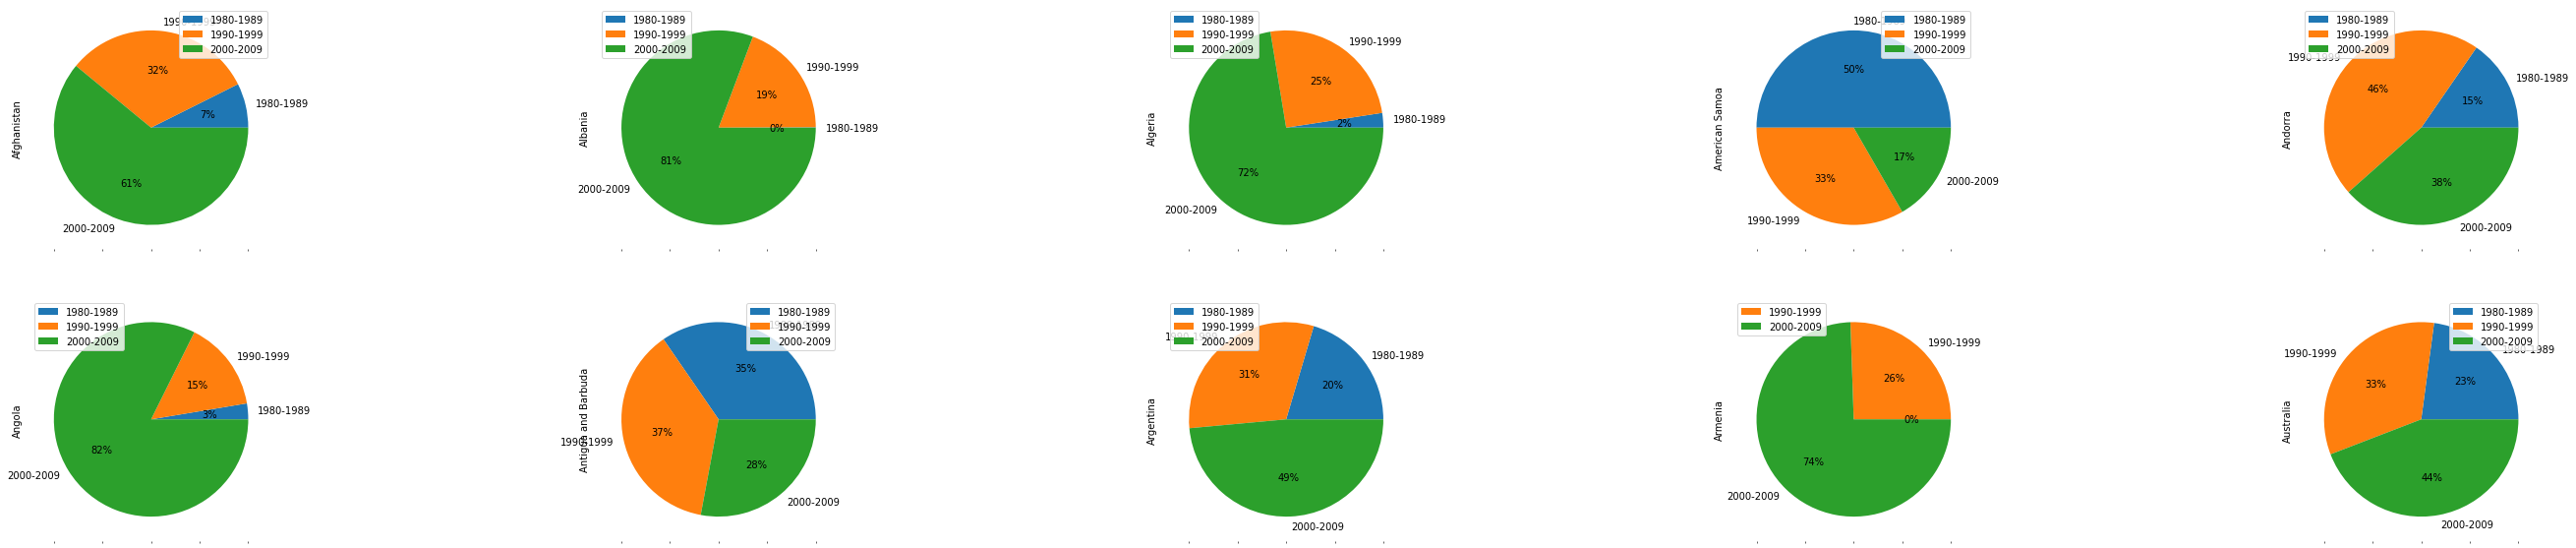

In [63]:
Canada.loc[country_list[:10], decade_cols].T.plot(
    kind='pie',
    figsize=(50,10),
    autopct='%1.f%%',
    subplots=True,
    layout=(2,5),
    )
plt.savefig('first_five_countries.png', bbox_inches='tight')

<AxesSubplot:>

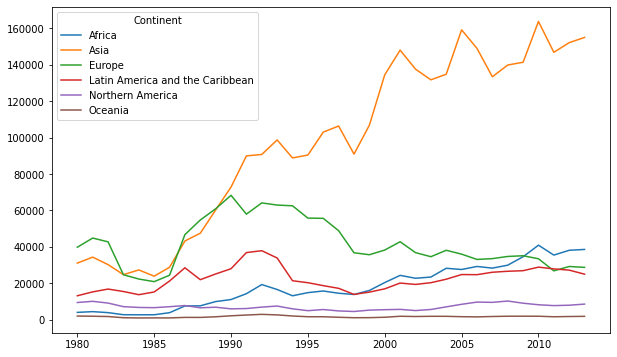

In [65]:
Canada.groupby('Continent').sum()[years].T.plot(kind='line', figsize=(10,6))

<AxesSubplot:>

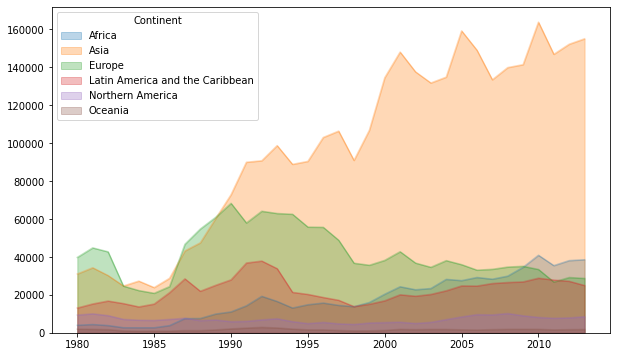

In [66]:
Canada.groupby('Continent').sum()[years].T.plot(
    kind='area', 
    figsize=(10,6),
    stacked=False,
    alpha=0.3
    )

In [74]:
from plotly.io import renderers
renderers.default= 'notebook'

In [76]:
px.scatter(Canada, x=Canada.index, y='2010', color='Continent', height=700)

In [80]:
Can2010 =Canada.sort_values(by='2010', ascending=False)
px.bar(Can2010, x=Can2010.index , y='2010', color='Continent', height=700)

In [83]:
px.choropleth(Canada,
              locations= Canada.index,
              locationmode='country names',
              color= '2013',
              color_continuous_scale='Viridis',
              range_color=(0, Canada['2013'].max()),
              title='Canada by 2013',
              template='plotly_dark',
              height=700
)